1. SQL

Ответ представить в виде SQL-запроса. Задание можно выполнять на любом диалекте SQL.
Имеется: таблица с клик-стрим данными. Поля - user_id, event_name и event_datetime.

Что нужно сделать:
1. Найти все сессии, в которые пользователь прошёл ключевой сценарий, т.е. совершил последовательность действий:

0.5) 0 или более раз заходил на любые страницы и что-то делал;

1) зашел на страницу ресторана (event_name = ‘restaurant_page’);

2) забронировал столик в ресторане (event_name = ‘reservation’);

3) разделил счет (event_name = ‘split_check’);

2. Посчитать конверсии из зашедших в прошедших целевой сценарий.

Сессией называется активность пользователя, в которой между последовательными действиями проходит менее получаса. Сессия начинается в момент первого из этих действий и заканчивается через полчаса после последнего из них.

--Run in PostgreSQL https://sqliteonline.com/

/*
drop table clickstream;
*/

CREATE TABLE clickstream(user_id	int, event_name	varchar(50), event_datetime varchar(50));
--select * from clickstream;
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 1, 'restaurant_page', '2011-03-15 01:17:06');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 1, 'other', '2012-03-15 01:17:07');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 1, 'reservation', '2012-03-15 01:34:46');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 5, 'restaurant_page', '2012-03-15 17:23:53');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 5, 'restaurant_page', '2012-03-15 17:05:00');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 5, 'reservation', '2012-03-15 01:27:53');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 5, 'other', '2012-03-15 01:27:54');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 5, 'split_check', '2012-03-15 02:09:38');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 5, 'restaurant_page', '2012-03-15 10:18:02');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 18, 'restaurant_page', '2012-03-15 11:38:42');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 18, 'reservation', '2012-03-15 12:42:59');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 18, 'restaurant_page', '2012-03-15 11:02:49');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 18, 'reservation', '2012-03-15 11:14:20');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 18, 'split_check', '2012-03-15 10:38:37');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 18, 'other', '2012-03-15 10:38:38');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 18, 'restaurant_page', '2012-03-15 09:52:16');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 18, 'reservation', '2012-03-15 10:57:04');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 18, 'split_check', '2012-03-15 10:32:20');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 18, 'other', '2012-03-15 10:32:21');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 18, 'restaurant_page', '2012-03-15 11:33:13');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 18, 'reservation', '2012-03-15 17:24:05');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 18, 'split_check', '2012-03-15 10:10:31');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 18, 'restaurant_page', '2012-03-15 10:01:25');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 18, 'other', '2012-03-15 10:01:26');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 18, 'reservation', '2012-03-15 10:35:20');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 18, 'split_check', '2012-03-15 03:20:36');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 21, 'restaurant_page', '2012-03-15 10:57:04');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 21, 'reservation', '2012-03-15 10:08:52');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 21, 'restaurant_page', '2012-03-15 12:02:26');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 21, 'reservation', '2012-03-15 12:09:28');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 21, 'restaurant_page', '2012-03-15 12:15:40');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 21, 'reservation', '2012-03-15 10:55:59');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 21, 'restaurant_page', '2012-03-15 01:43:31');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 21, 'other', '2012-03-15 01:43:32');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 21, 'split_check', '2012-03-15 12:10:11');
insert into clickstream (user_id, event_name, event_datetime) VALUES ( 21, 'split_check', '2012-03-15 17:57:42');

--select * from clickstream


--drop table with_prev_time;
create table with_prev_time (user_id	int, event_name	varchar(50), event_datetime varchar(50), prev_datetime varchar(50), datediff FLOAT);

insert into with_prev_time 
select t.* 
, (((DATE_PART('day', event_datetime::timestamp - prev_datetime::timestamp) * 24 + 
                DATE_PART('hour', event_datetime::timestamp - prev_datetime::timestamp)) * 60 +
                DATE_PART('minute', event_datetime::timestamp - prev_datetime::timestamp)) * 60 +
                DATE_PART('second', event_datetime::timestamp - prev_datetime::timestamp))/60
as datediff
from(
select user_id, event_name, event_datetime, 
lag(event_datetime) OVER (PARTITION BY user_id ORDER BY event_datetime) AS prev_datetime
 --, (((DATE_PART('day', event_datetime::timestamp - lag(event_datetime)::timestamp) * 24 + 
 --               DATE_PART('hour', event_datetime::timestamp - lag(event_datetime)::timestamp)) * 60 +
 --               DATE_PART('minute', event_datetime::timestamp - lag(event_datetime)::timestamp)) * 60 +
--                DATE_PART('second', event_datetime::timestamp - lag(event_datetime)::timestamp))/60 as date_diff
--   OVER (PARTITION BY user_id ORDER BY event_datetime) as date_d
--, count(event_datetime) OVER (PARTITION BY user_id /*ORDER BY event_datetime ASC*/) 
from clickstream
--where datediff(ss, event_datetime, prev_datetime)<30*60 
order by user_id, event_datetime desc) as T;

/*where prev_datetime is Null or (((DATE_PART('day', event_datetime::timestamp - prev_datetime::timestamp) * 24 + 
                DATE_PART('hour', event_datetime::timestamp - prev_datetime::timestamp)) * 60 +
                DATE_PART('minute', event_datetime::timestamp - prev_datetime::timestamp)) * 60 +
                DATE_PART('second', event_datetime::timestamp - prev_datetime::timestamp))/60<30*/;
                

alter TABLE with_prev_time add COLUMN sess_code varchar(50);
update with_prev_time set datediff=111 where datediff is null;

update with_prev_time set sess_code=user_id || '_' || event_datetime where datediff>30;



update with_prev_time A set sess_code= 
(select B.sess_code  from with_prev_time B 
-- order by user_id, event_datetime 
 where A.user_id=B.user_id and A.event_datetime>B.event_datetime and B.sess_code is not NULL limit 1) 
where a.sess_code is null;

--(select EXISTS(select * from with_prev_time where sess_code is NULL));

SELECT  event_name, user_id, event_datetime, sess_code, datediff, prev_datetime from with_prev_time order by user_id, event_datetime; 


--Task 1 COMPLETE. All sessions where checkpoint is reached. Session is encoded by user_id + start_time
select sess_code--, count(distinct event_name) --OVER (partition by sess_code)
from with_prev_time 
--where any('restaurant_page', 'reservation', 'split_check') IN event_name  
where  event_name='restaurant_page' or event_name='reservation' or event_name='split_check'
group by sess_code--, event_name 
having count(distinct event_name)=3 
order by 1;

-- Task 2. Conversion by visits=sessions, NOT by unique users
select 
1.00*(select count(*) from 
 (select sess_code--, count(distinct event_name) --OVER (partition by sess_code)
from with_prev_time 
--where any('restaurant_page', 'reservation', 'split_check') IN event_name  
where  event_name='restaurant_page' or event_name='reservation' or event_name='split_check'
group by sess_code--, event_name 
having count(distinct event_name)=3 ) as subq)
/
(Select count(DISTINCT sess_code) from with_prev_time)
;

# 2. Python

## Просегментируйте рестораны по проценту проникновения чекина в стол.

In [33]:
import pandas as pd
import numpy as np

In [ ]:
#таблицу с исходными данными сгенерировал. Т.к. ее не было в приложении к письму или на гугл-диске

In [218]:
cs=pd.read_csv('clickstream.csv')

In [219]:
cs

,user_id,event_name,event_datetime
0,1,restaurant_page,2012-03-15 01:17:06
1,1,reservation,2012-03-15 01:34:46
2,5,restaurant_page,2012-03-15 17:23:53
3,5,restaurant_page,2012-03-15 17:05:00
4,5,reservation,2012-03-15 01:27:53
5,5,split_check,2012-03-15 02:09:38
6,5,restaurant_page,2012-03-15 10:18:02
7,18,restaurant_page,2012-03-15 11:38:42
8,18,reservation,2012-03-15 12:42:59
9,18,restaurant_page,2012-03-15 11:02:49


OId - id ресторана,
OrderId - id заказа,
ActivationType - тип авторизации пользователя в заказе (например, по номеру стола или номеру телефона),
LoginEntryId - id пользователя,
RegistrationTime - время заказа

In [27]:
df=pd.read_csv('orders.csv')

In [200]:
df.tail(20)

,OId,OrderId,ActivationType,LoginEntryId,RegistrationTime
329053,3a5aa03f-0520-4ae3-2fc0-08d6fa3dda6b,ffef38a0-2668-4e85-bcc6-e161bec9658b,-1,NaN,2019-08-14 14:02:25
329054,79f16d45-4d93-4a04-8bb6-08d70bac287a,fff05cfd-9251-4598-bcd9-4eb8eb4947b3,-1,NaN,2019-08-14 22:01:44
329055,d2df2066-9a9c-4268-4ae0-08d6fa3dd980,fff14d62-5b96-4f7a-18a0-08d71c13d1c2,-1,NaN,2019-08-14 08:32:00
329056,e97b7b45-905c-430d-8a54-9b09da6d7dae,fff2133a-5ddc-44e2-9254-4b40be85e636,-1,NaN,2019-08-14 21:10:03
329057,d64d6f1c-fb5f-e711-8111-0050560102b9,fff213e7-325b-42cf-bc7a-750a39cfa778,-1,NaN,2019-08-14 11:34:46
329058,71a6576b-dc61-11e4-80da-0050560102b9,fff27e44-afa2-4645-2ae5-08d71c13d289,5,38b984b0-a739-e911-a2c3-005056111137,2019-08-14 13:44:37
329059,7d98950a-d3b9-4fd0-2a8c-08d6f9ae5616,fff3060e-4302-406b-bace-8c9d84935f0e,10,5aca39b7-37a0-4e15-38dd-08d7013198cd,2019-08-14 11:57:48
329060,6be0cf0f-90b9-44ab-fcc1-08d70f880a2b,fff3ef5e-cc05-45b7-9eaa-7eee4f167780,-1,NaN,2019-08-14 10:56:14
329061,36bfc569-3291-e611-80fa-005056010fa5,fff45880-4f04-463d-cd51-08d71c13d281,7,b9d47e67-4ac6-e811-a2ba-005056110660,2019-08-14 13:36:27
329062,c7c525a3-f2fc-e611-80f3-0050560102b9,fff4b84d-207f-4df3-12d0-08d71c165249,-1,NaN,2019-08-14 13:27:08


In [6]:
df.count()

OId                 329073
OrderId             329073
ActivationType      329073
LoginEntryId         37910
RegistrationTime    329073
dtype: int64

In [28]:
#df.OId.unique()
#df = df.groupby('domain')['ID'].nunique()
df.nunique()

OId                    414
OrderId             329073
ActivationType          11
LoginEntryId         23746
RegistrationTime    171675
dtype: int64

In [8]:
df.LoginEntryId.unique()

array([nan, '9e464ffa-bd39-e911-a2c3-005056111137',
       'd6f3a856-63ed-4d37-849d-d27db7a4e528', ...,
       '5aca39b7-37a0-4e15-38dd-08d7013198cd',
       'f3052a55-f696-4ee8-5b8c-08d7143cee52',
       '737bd97f-c22a-4876-9469-08d71c165186'], dtype=object)

In [10]:
df.groupby(['ActivationType']).size()

ActivationType
-1     290892
 0        179
 1         57
 2       8378
 5      11777
 7       3937
 9       4136
 10      5599
 13       599
 14      3127
 17       392
dtype: int64

In [58]:
#df.groupby(['LoginEntryId']).count()
#df.groupby(['LoginEntryId']).size()
df.OId.count()

329073

Для подсчета проникновения по ресторану делаем две агрегированные таблицы: общаяя и с типом активации 14, чтобы потом поделить второе на первое

In [78]:
all_rest=df.groupby("OId").OrderId.count().reset_index(name='count') \
                             .sort_values(['count'], ascending=False).rename(columns={'count': 'count_ord'})

succ_ord=df[df['ActivationType']==14].groupby("OId").OrderId.count().reset_index(name='count') \
                             .sort_values(['count'], ascending=False).rename(columns={'count': 'count_succ_ord'})


In [79]:
#all_rest.head()
succ_ord.head()

,OId,count_succ_ord
38,6dcdf611-35ad-e811-a2b8-005056110660,273
10,26bd3a99-7f33-e911-a2c4-00505611114a,247
88,e84ac806-e548-443a-a35b-d407454bfc0c,204
62,a1422d5d-7924-e911-9668-00505611117e,156
94,f164a99d-be47-462e-9259-1712ce6bb569,145


In [131]:
print(all_rest.OId.nunique())
print(succ_ord.OId.nunique())
print(succ_ord.OId.nunique()/all_rest.OId.nunique(), '(. У 1/4 ресторанов есть заказы с нужным типом активации)') 
print(all_rest.count_ord.sum())
print(succ_ord.count_succ_ord.sum())
print(succ_ord.count_succ_ord.sum()/all_rest.count_ord.sum(), '(. меньше 1 % всех заказов совершены с типом активации 14)') 

414
106
0.2560386473429952 (. У 1/4 ресторанов есть заказы с нужным типом активации)
329073
3127
0.009502450823981306 (. меньше 1 % всех заказов совершены с типом активации 14)


In [88]:
perc_checkin=all_rest.set_index('OId').join(succ_ord.set_index('OId'), on='OId').reset_index().fillna(0)
#perc_checkin=all_rest.join(succ_ord, on='OId')

In [89]:
#вычислим процент проникновения чекина в стол
perc_checkin['perc']=perc_checkin['count_succ_ord']/perc_checkin['count_ord']

In [91]:
perc_checkin.sort_values(['perc'], ascending=False)

,OId,count_ord,count_succ_ord,perc
264,6dcdf611-35ad-e811-a2b8-005056110660,323,273.0,0.845201
223,26bd3a99-7f33-e911-a2c4-00505611114a,452,247.0,0.546460
289,6c0bfd67-99c8-e811-a2b9-00505611096c,275,91.0,0.330909
225,f164a99d-be47-462e-9259-1712ce6bb569,445,145.0,0.325843
365,e3c730a4-2184-e711-8112-005056010fa5,109,35.0,0.321101
108,e84ac806-e548-443a-a35b-d407454bfc0c,961,204.0,0.212279
139,a1422d5d-7924-e911-9668-00505611117e,757,156.0,0.206077
380,97850e2f-aed3-42c2-4eeb-08d6ca1ee8ad,84,10.0,0.119048
159,9851a838-a58c-e711-8111-0050560102b9,656,72.0,0.109756
145,f3e817d6-a28c-e711-8111-0050560102b9,708,66.0,0.093220


In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

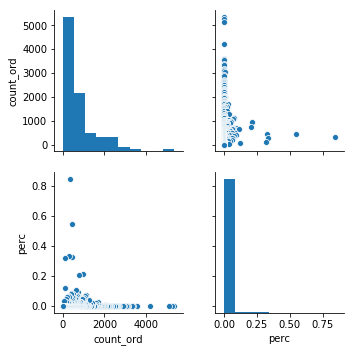

In [116]:
sns.pairplot(perc_checkin[['count_ord', 'perc']])

In [108]:
only_succ=perc_checkin[perc_checkin['perc']>0]

#perc_checkin[perc_checkin['perc']>0]['count_ord', 'perc']

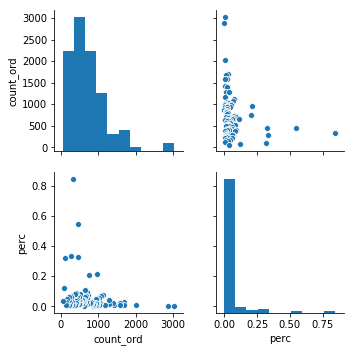

In [117]:
sns.pairplot(only_succ[['count_ord', 'perc']])

In [111]:
only_succ.sort_values(['perc'], ascending=False)

,OId,count_ord,count_succ_ord,perc
264,6dcdf611-35ad-e811-a2b8-005056110660,323,273.0,0.845201
223,26bd3a99-7f33-e911-a2c4-00505611114a,452,247.0,0.546460
289,6c0bfd67-99c8-e811-a2b9-00505611096c,275,91.0,0.330909
225,f164a99d-be47-462e-9259-1712ce6bb569,445,145.0,0.325843
365,e3c730a4-2184-e711-8112-005056010fa5,109,35.0,0.321101
108,e84ac806-e548-443a-a35b-d407454bfc0c,961,204.0,0.212279
139,a1422d5d-7924-e911-9668-00505611117e,757,156.0,0.206077
380,97850e2f-aed3-42c2-4eeb-08d6ca1ee8ad,84,10.0,0.119048
159,9851a838-a58c-e711-8111-0050560102b9,656,72.0,0.109756
145,f3e817d6-a28c-e711-8111-0050560102b9,708,66.0,0.093220


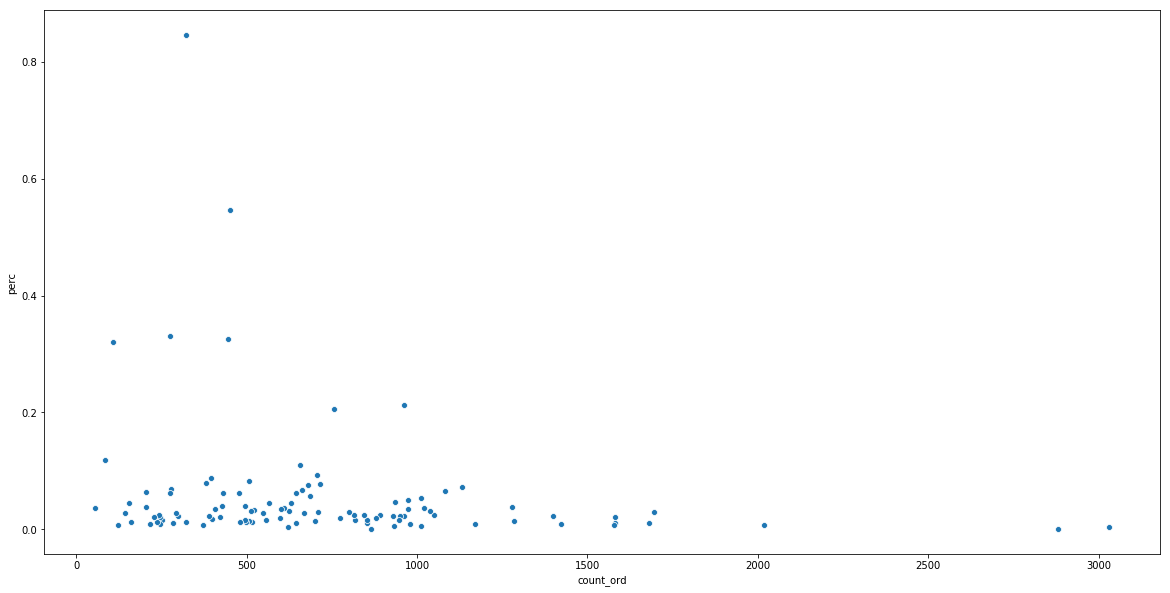

In [118]:
sns.scatterplot(x="count_ord", y="perc", data=only_succ)

In [176]:
#Определим количество бинов в гистограмме по правилу Freedman-Diaconis
#Bin_width=2*IQR(x)/(n**(1/3))
IQR_x=np.percentile(only_succ.perc, 75)-np.percentile(only_succ.perc, 25)
print(IQR_x)
n=only_succ.perc.size
Bin_width=2*IQR_x/(n**(1/3))
print(Bin_width)
n_bins=(only_succ.perc.max()-only_succ.perc.min())/Bin_width
n_bins=int(round(n_bins,0))
print(n_bins)

0.03458087223305385
0.01461382774168381
58


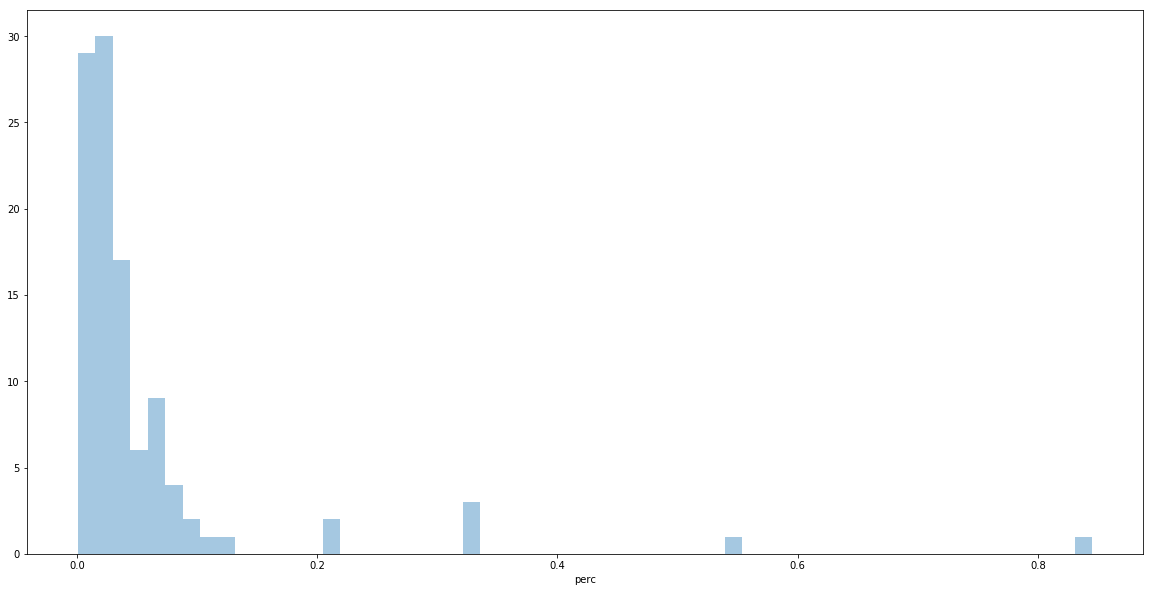

In [177]:
#sns.distplot(only_succ.perc);
sns.distplot(only_succ.perc, bins=n_bins, kde=0);

In [173]:
np.histogram(only_succ.perc, n_bins)

(array([29, 32, 17,  4,  9,  5,  1,  2,  0,  0,  0,  0,  0,  1,  1,  0,  0,
         0,  0,  0,  0,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  1]),
 array([6.94685655e-04, 1.55105901e-02, 3.03264945e-02, 4.51423990e-02,
        5.99583034e-02, 7.47742078e-02, 8.95901123e-02, 1.04406017e-01,
        1.19221921e-01, 1.34037826e-01, 1.48853730e-01, 1.63669634e-01,
        1.78485539e-01, 1.93301443e-01, 2.08117348e-01, 2.22933252e-01,
        2.37749157e-01, 2.52565061e-01, 2.67380965e-01, 2.82196870e-01,
        2.97012774e-01, 3.11828679e-01, 3.26644583e-01, 3.41460488e-01,
        3.56276392e-01, 3.71092297e-01, 3.85908201e-01, 4.00724105e-01,
        4.15540010e-01, 4.30355914e-01, 4.45171819e-01, 4.59987723e-01,
        4.74803628e-01, 4.89619532e-01, 5.04435436e-01, 5.19251341e-01,
        5.34067245e-01, 5.48883150e-01, 5.63699054e-01, 5.78514959e-01,
        5.93330863

In [ ]:
похоже на гамма-распределение c выбросами справа

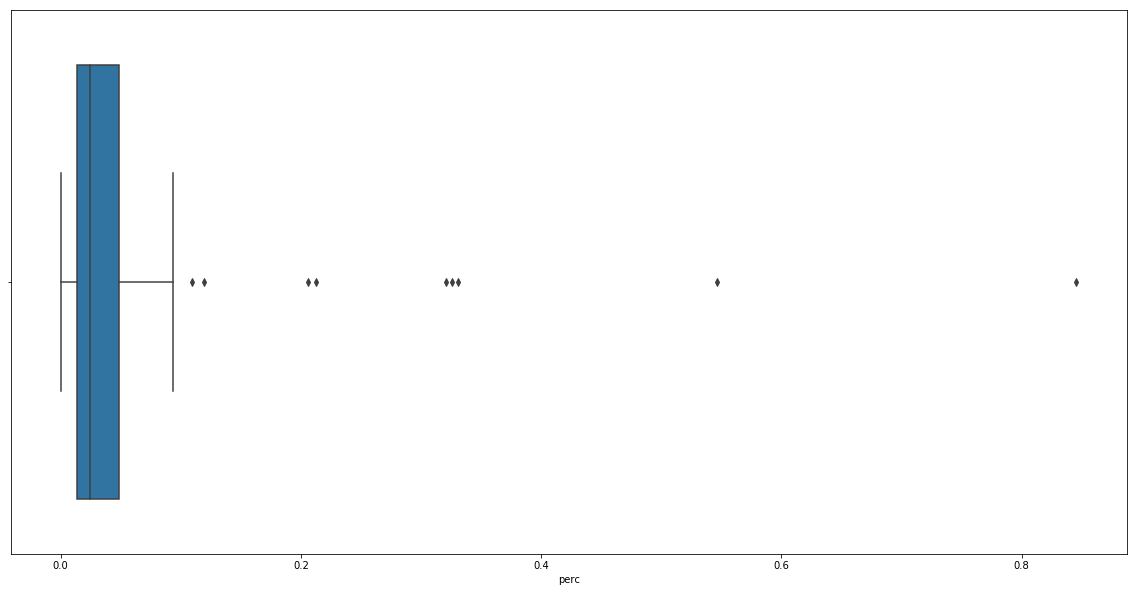

In [134]:
sns.boxplot(only_succ.perc)

In [367]:
import scipy.stats as stats    
#alpha = 5
#loc = 100.5
#beta = 22

fit_alpha, fit_loc, fit_beta=stats.gamma.fit(only_succ.perc)
print(fit_alpha, fit_loc, fit_beta)

0.25343375150570824 0.0006946856547412293 1.2328940978809353


In [365]:
stats.gamma.fit?

In [364]:
a=fit_alpha
x=only_succ.perc
gamma.pdf(x, a) = lambda**a * x**(a-1) * exp(-lambda*x) / gamma(a)
#gamma.pdf(x, a) = lambda**a * x**(a-1) * exp(-lambda*x) / gamma(a)

SyntaxError: invalid syntax (<ipython-input-364-dd43662ce329>, line 3)

In [ ]:
ax.plot(x, gamma.pdf(x, a),
...          'r-', lw=5, alpha=0.6, label='gamma pdf')

In [138]:
only_succ.perc.describe()

count    106.000000
mean       0.055763
std        0.109065
min        0.000695
25%        0.013877
50%        0.024786
75%        0.048458
max        0.845201
Name: perc, dtype: float64

In [167]:
p33=np.percentile(only_succ.perc, 33)
p67=np.percentile(only_succ.perc, 67)
print(p33)
print(p67)

0.01715468248085001
0.037587702776782465


In [191]:
#only_succ.segm=if only_succ.perc<p33:
#    then
    
#only_succ.segm==only_succ.apply(lambda x: if x<p33 then '' else: '') 
only_succ['segm']=only_succ["perc"].apply(lambda x: 'S1' if x<p33 else ('S3' if x>p67  else 'S2'))
#else (x**2 if x<4 else x+10)

/home/zamarseny/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [363]:
only_succ.sort_values(['perc'], ascending=False)

,OId,count_ord,count_succ_ord,perc,segm
264,6dcdf611-35ad-e811-a2b8-005056110660,323,273.0,0.845201,S3
223,26bd3a99-7f33-e911-a2c4-00505611114a,452,247.0,0.546460,S3
289,6c0bfd67-99c8-e811-a2b9-00505611096c,275,91.0,0.330909,S3
225,f164a99d-be47-462e-9259-1712ce6bb569,445,145.0,0.325843,S3
365,e3c730a4-2184-e711-8112-005056010fa5,109,35.0,0.321101,S3
108,e84ac806-e548-443a-a35b-d407454bfc0c,961,204.0,0.212279,S3
139,a1422d5d-7924-e911-9668-00505611117e,757,156.0,0.206077,S3
380,97850e2f-aed3-42c2-4eeb-08d6ca1ee8ad,84,10.0,0.119048,S3
159,9851a838-a58c-e711-8111-0050560102b9,656,72.0,0.109756,S3
145,f3e817d6-a28c-e711-8111-0050560102b9,708,66.0,0.093220,S3


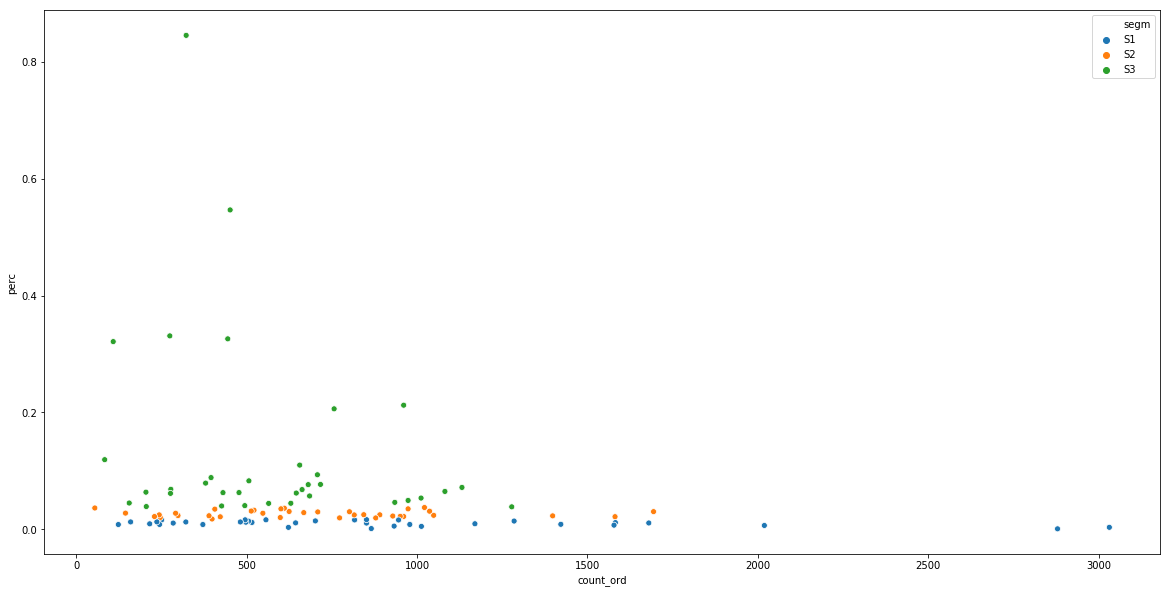

In [368]:
#Готовы три сегмента с сопоставимым количеством ресторанов в каждом. 



In [374]:
only_succ['segm']=only_succ["perc"].\
apply(lambda x: 'S1' if x<p33 else ('S4' if x>0.1340 else ('S3' if x>p67  else 'S2')))

/home/zamarseny/anaconda3/envs/nlp/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


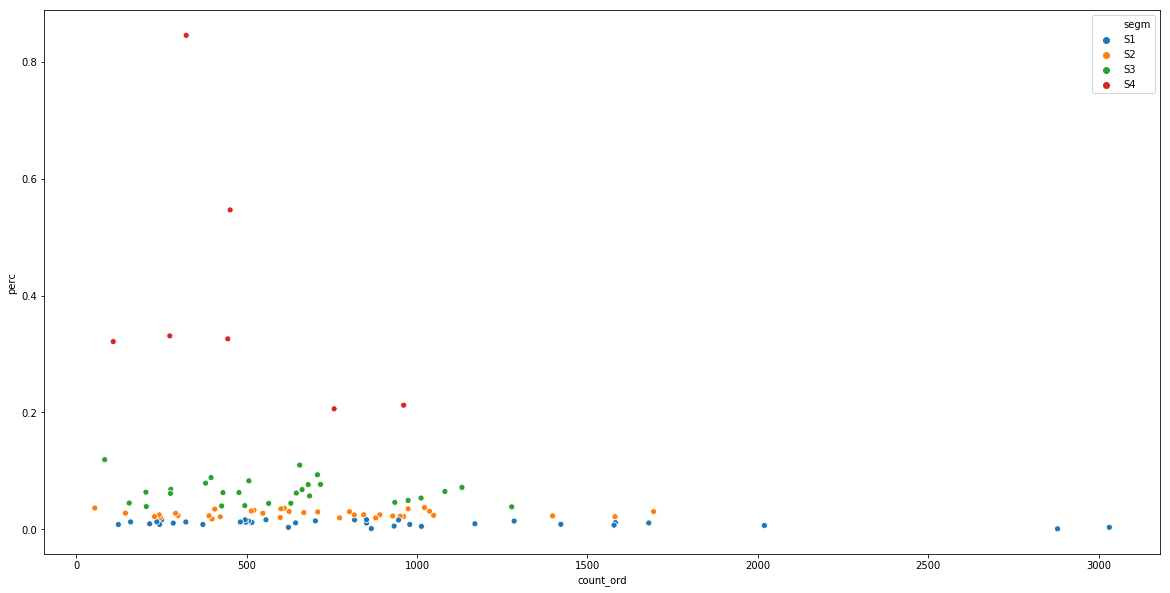

In [375]:
#Можно выделить из S3 сегмент S4, где % больше чем 0.1340 
#(середина первого обрыва гистограммы). 
#Тогда S4 хорошо отделялся бы от остальных и его можно изучать особо пристально.

sns.scatterplot(x="count_ord", y="perc", data=only_succ, hue='segm')

## Посчитайте скорость в кол-ве дней, с которой ресторан достигает процента проникновения чекина в стол в 20% (т.е. вначале у ресторана оно было меньше, затем стало больше или равно 20%)


In [196]:
df.info()
#df.['reg_day']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329073 entries, 0 to 329072
Data columns (total 5 columns):
OId                 329073 non-null object
OrderId             329073 non-null object
ActivationType      329073 non-null int64
LoginEntryId        37910 non-null object
RegistrationTime    329073 non-null object
dtypes: int64(1), object(4)
memory usage: 12.6+ MB


In [207]:
#dt = datetime.strptime("21/11/06 16:30", "%d/%m/%y %H:%M")

from datetime import datetime, date, time
dt = datetime.strptime('2019-08-12 12:21:43', "%Y-%m-%d %H:%M:%S")
dt=datetime.date(dt)
dt

datetime.date(2019, 8, 12)

In [208]:
datetime.strftime(dt, "%Y-%m-%d %H:%M:%S") 

'2019-08-12 00:00:00'

In [216]:
df['dt']=df.RegistrationTime.apply(lambda x: datetime.date(datetime.strptime(x, "%Y-%m-%d %H:%M:%S")) )

In [224]:
df['nmb_good_ord']=df.ActivationType.apply(lambda x: 1 if x==14 else 0)

In [225]:
df.head()

,OId,OrderId,ActivationType,LoginEntryId,RegistrationTime,dt,nmb_good_ord
0,f1965959-0dc2-4fcd-7e59-08d70f880a25,00006919-4979-4960-bc49-08d71c13cd44,-1,NaN,2019-08-12 12:21:43,2019-08-12,0
1,83a1326c-6279-462e-afe0-08d7143c5247,0000ee0d-fe91-4346-a5dc-494cc97fb24f,-1,NaN,2019-08-11 17:46:37,2019-08-11,0
2,3f553a92-116f-11e4-8bac-50465d4d1d14,0000f4ab-777c-4d2f-81fb-e46b2376b23b,-1,NaN,2019-08-11 17:36:52,2019-08-11,0
3,2fbe9269-6093-4a35-16ba-08d6f0cec8aa,0001c73a-99d4-40c5-84f7-cf1562ac7fea,-1,NaN,2019-08-12 07:51:11,2019-08-12,0
4,cd15b0dd-f05e-e611-80ea-0050560102b9,00034022-282c-4b1d-a5d6-4d34c36ce577,-1,NaN,2019-08-12 11:31:47,2019-08-12,0


In [277]:
aggregated=df.groupby(["OId", 'dt']).agg({'OrderId' : 'count', 'nmb_good_ord' : 'sum'}, axis="columns")\
                             .sort_values(['OId', 'dt'], ascending=False).reset_index(level=[0,1]).\
    rename(columns={'OrderId': 'count_ord'})

In [278]:
aggregated.head()

,OId,dt,count_ord,nmb_good_ord
0,ff78ce2a-05fb-4838-3bf6-08d6e43e4c5c,2019-08-14,123,0
1,ff78ce2a-05fb-4838-3bf6-08d6e43e4c5c,2019-08-13,94,0
2,ff78ce2a-05fb-4838-3bf6-08d6e43e4c5c,2019-08-12,109,0
3,ff78ce2a-05fb-4838-3bf6-08d6e43e4c5c,2019-08-11,126,0
4,ff1f3d7a-5625-e911-9668-00505611117e,2019-08-14,25,0


In [279]:
aggregated['perc']=aggregated['nmb_good_ord']/aggregated['count_ord']

In [307]:
aggregated

,OId,dt,count_ord,nmb_good_ord,perc
0,ff78ce2a-05fb-4838-3bf6-08d6e43e4c5c,2019-08-14,123,0,0.000000
1,ff78ce2a-05fb-4838-3bf6-08d6e43e4c5c,2019-08-13,94,0,0.000000
2,ff78ce2a-05fb-4838-3bf6-08d6e43e4c5c,2019-08-12,109,0,0.000000
3,ff78ce2a-05fb-4838-3bf6-08d6e43e4c5c,2019-08-11,126,0,0.000000
4,ff1f3d7a-5625-e911-9668-00505611117e,2019-08-14,25,0,0.000000
5,ff1f3d7a-5625-e911-9668-00505611117e,2019-08-13,28,0,0.000000
6,ff1f3d7a-5625-e911-9668-00505611117e,2019-08-12,22,0,0.000000
7,ff1f3d7a-5625-e911-9668-00505611117e,2019-08-11,4,0,0.000000
8,ff05644b-62d7-e811-a2bc-00505611096a,2019-08-14,87,0,0.000000
9,ff05644b-62d7-e811-a2bc-00505611096a,2019-08-13,65,0,0.000000


In [335]:
big_perc=aggregated[aggregated.perc>0.2].groupby("OId").agg({'dt': 'min'}).reset_index().rename(columns={'dt': 'key_dt'})
#big_perc=aggregated[aggregated.perc>0.2].groupby("OId").dt.min()
#big_perc=aggregated[aggregated.perc>0.2].OId.unique()

In [336]:
big_perc

,OId,key_dt
0,26bd3a99-7f33-e911-a2c4-00505611114a,2019-08-12
1,6c0bfd67-99c8-e811-a2b9-00505611096c,2019-08-12
2,6dcdf611-35ad-e811-a2b8-005056110660,2019-08-12
3,a1422d5d-7924-e911-9668-00505611117e,2019-08-13
4,e3c730a4-2184-e711-8112-005056010fa5,2019-08-12
5,e84ac806-e548-443a-a35b-d407454bfc0c,2019-08-12
6,f164a99d-be47-462e-9259-1712ce6bb569,2019-08-12


In [ ]:
#из условия не однозначно понятно как брать начальную точку отсчета для каждого ресторана: 
#1)с начала истории 
#2)или с момента, когда процент стал больше нуля. 
#Считаю по первому сценарию
#Конечная точка - первая дата, когда достигнут показатель 20%

In [337]:
min_date=aggregated[aggregated.OId.isin(big_perc.OId)].groupby("OId").agg({'dt': 'min'}).reset_index().rename(columns={'dt': 'min_dt'})

In [338]:
min_date

,OId,min_dt
0,26bd3a99-7f33-e911-a2c4-00505611114a,2019-08-11
1,6c0bfd67-99c8-e811-a2b9-00505611096c,2019-08-11
2,6dcdf611-35ad-e811-a2b8-005056110660,2019-08-12
3,a1422d5d-7924-e911-9668-00505611117e,2019-08-12
4,e3c730a4-2184-e711-8112-005056010fa5,2019-08-12
5,e84ac806-e548-443a-a35b-d407454bfc0c,2019-08-11
6,f164a99d-be47-462e-9259-1712ce6bb569,2019-08-11


In [347]:
joined=min_date.set_index('OId').join(big_perc.set_index('OId'), on ='OId').reset_index()

In [352]:
joined.key_dt=pd.to_datetime(joined.key_dt)
joined.min_dt=pd.to_datetime(joined.min_dt)

In [360]:
joined['diff']=abs((joined.key_dt - joined.min_dt))

In [361]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
OId       7 non-null object
min_dt    7 non-null datetime64[ns]
key_dt    7 non-null datetime64[ns]
diff      7 non-null timedelta64[ns]
dtypes: datetime64[ns](2), object(1), timedelta64[ns](1)
memory usage: 304.0+ bytes


In [362]:
#joined.diff=abs((joined.key_dt - joined.min_dt).days)
joined

,OId,min_dt,key_dt,diff
0,26bd3a99-7f33-e911-a2c4-00505611114a,2019-08-11,2019-08-12,1 days
1,6c0bfd67-99c8-e811-a2b9-00505611096c,2019-08-11,2019-08-12,1 days
2,6dcdf611-35ad-e811-a2b8-005056110660,2019-08-12,2019-08-12,0 days
3,a1422d5d-7924-e911-9668-00505611117e,2019-08-12,2019-08-13,1 days
4,e3c730a4-2184-e711-8112-005056010fa5,2019-08-12,2019-08-12,0 days
5,e84ac806-e548-443a-a35b-d407454bfc0c,2019-08-11,2019-08-12,1 days
6,f164a99d-be47-462e-9259-1712ce6bb569,2019-08-11,2019-08-12,1 days
